In [1]:
import os
import sys
import segyio
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt, hilbert 

sys.path.append('..')

from seismicpro.batchflow import Dataset
from seismicpro.src import (SeismicBatch, SegyFilesIndex, FieldIndex, TraceIndex,
                            seismic_plot, spectrum_plot, merge_segy_files, KNNIndex)

path_raw = '/Users/anton/work/geolog/raw_data/2_Egor_TAR/P00_raw.sgy'

field_index = (FieldIndex(name='raw', extra_headers=['offset'], path=path_raw))
field_index.head()

,TraceNumber,offset,TRACE_SEQUENCE_FILE,file_id
,,,raw,raw
FieldRecord,,,,
2020,285,549,1,/Users/anton/work/geolog/raw_data/2_Egor_TAR/P...
2020,286,-555,2,/Users/anton/work/geolog/raw_data/2_Egor_TAR/P...
2020,284,564,3,/Users/anton/work/geolog/raw_data/2_Egor_TAR/P...
2020,287,-583,4,/Users/anton/work/geolog/raw_data/2_Egor_TAR/P...
2020,283,600,5,/Users/anton/work/geolog/raw_data/2_Egor_TAR/P...


In [4]:
batch = (Dataset(field_index, SeismicBatch).next_batch(500)
         .load(fmt='segy', components='raw', tslice=slice(3000))
)

### one trace

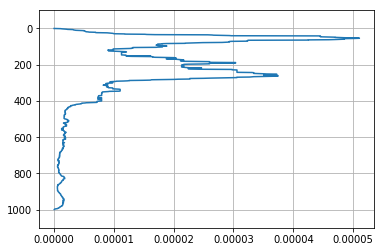

In [70]:
trace = batch.raw[0][0]

sample = batch.raw[22]
sample = np.abs(sample[250: 450, 100: 700])

H = hilbert(trace).real

env = (trace**2 + H**2)**.5

filtered = medfilt(env, 51)
xbounds = (min(filtered)-min(filtered)*100, max(filtered)+min(filtered)*100)
ybounds = (len(filtered)+100, -100)
plt.plot(filtered, range(len(filtered)))
plt.xlim(xbounds)
plt.ylim(ybounds)
plt.grid()

### area

In [1]:
sample = batch.raw[22]
sample = np.abs(sample[250: 450, 100: 700])

### images

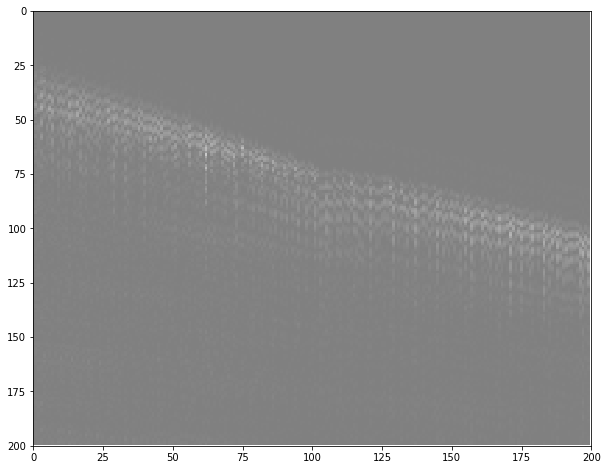

In [201]:
cv = 0.9

seismic_plot(sample*5000, figsize=(10, 8),
             vmin=-cv, vmax=cv, cmap='gray')

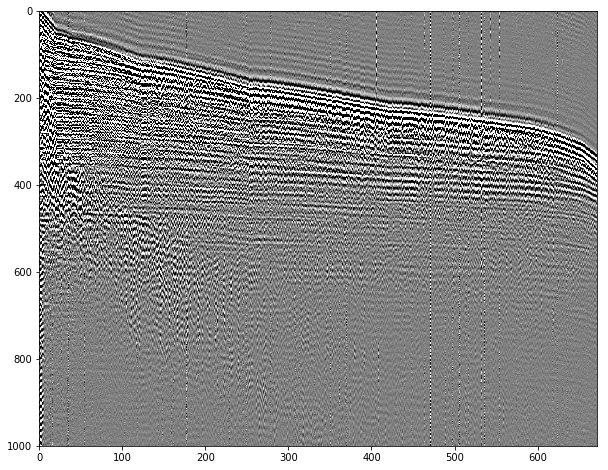

In [105]:
cv = 0.1

seismic_plot(batch.raw[22]*80000, figsize=(10, 8),
             vmin=-cv, vmax=cv, cmap='gray')

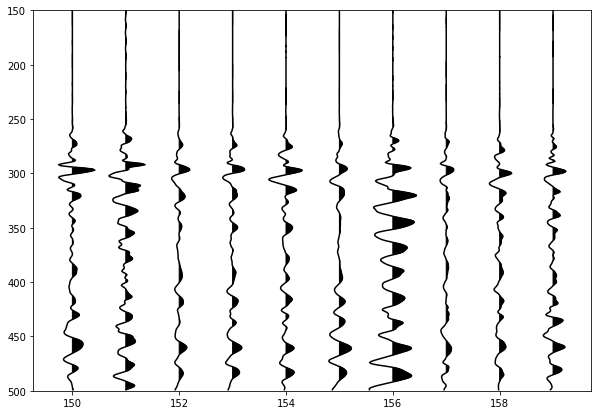

In [20]:
seismic_plot(batch_true.raw[0],# pts=(np.arange(len(picks)), picks), s=12, c='r',
            xlim=(150, 160), ylim=(150, 500), std=0.15, 
             figsize=(10, 7), wiggle=True)